In [37]:
import pandas as pd
from datetime import datetime
import io
import matplotlib.pyplot as plt
import numpy as np

In [2]:
teaming_df = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx')

display(teaming_df)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community
...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community
9541,542077,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community


In [3]:
ifsps_df = pd.read_excel('TEIS_IFSP_Teaming_Jan_2022-_Jan_2023.xlsx', sheet_name='All Children with IFSPs')
display(ifsps_df)

C:\Users\Erica\anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT
...,...,...,...,...
138659,UC,539845,2022-11-03,NaT
138660,UC,499575,2021-03-11,NaT
138661,UC,540987,2022-11-16,NaT
138662,UC,526430,2022-07-19,2023-02-13


In [5]:
# reformating datetime datatypes to prepare for subtraction
teaming_df['START_TIME'] = pd.to_datetime(teaming_df['START_TIME'], format='%H:%M:%S').dt.time
teaming_df['END_TIME'] = pd.to_datetime(teaming_df['END_TIME'], format='%H:%M:%S').dt.time

# calculate the time difference
teaming_df['TIME_DIFFERENCE'] = pd.to_datetime(teaming_df['END_TIME'], format='%H:%M:%S') - pd.to_datetime(teaming_df['START_TIME'], format='%H:%M:%S')

teaming_df


,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,TIME_DIFFERENCE
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
3,457852,2022-01-12,14:00:00,15:00:00,Community-based,Service Delivered,HEMELKATIE1,2022-01-18 10:39:51,IEP Meeting,LTVEC,EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
4,458051,2022-01-12,12:00:00,13:00:00,Telehealth,Service Delivered,JONESMEGAN,2022-01-12 13:46:48,IFSP Meeting,"First Steps, Inc (EIRA)",EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9538,541337,2023-01-10,15:00:00,16:00:00,Home,Service Delivered,WESTAMY,2023-01-12 17:55:59,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
9539,541511,2023-01-19,13:30:00,14:30:00,Home,Service Delivered,WESTAMY,2023-01-20 16:11:04,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
9540,541890,2023-01-19,09:00:00,10:00:00,Home,Service Delivered,WESTAMY,2023-01-20 10:23:05,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
9541,542077,2023-01-30,14:30:00,15:20:00,Telehealth,Service Delivered,FANELLASAMANTHA,2023-01-30 15:21:59,IFSP Meeting,Pediatric Language Clinic,EIRA,Dev. Therapy Prof - Home/Community,0 days 00:50:00


In [6]:
# getting avg meeting time per teaming ID
average_time_difference = teaming_df.groupby('IFSP Teaming ID name')['TIME_DIFFERENCE'].mean()
average_time_difference


IFSP Teaming ID name
Co-Visit       0 days 00:58:25.544409102
IEP Meeting    0 days 00:50:52.750397456
IFSP Meeting   0 days 00:54:33.176910299
Name: TIME_DIFFERENCE, dtype: timedelta64[ns]

* How many children are receiving co-visits? 

In [4]:
# inspecting columns in first data frame
teaming_df.columns

Index(['CHILD_ID', 'SERVICE_DATE', 'START_TIME', 'END_TIME', 'SERVICE_SETTING',
       'SERVICE DELIVERY', 'ADD_USER', 'ADD_DATE', 'IFSP Teaming ID name',
       'Agency Name', 'Agency Type', 'Service Name'],
      dtype='object')

In [7]:
# count of meetings per teaming ID
counts = teaming_df.groupby('IFSP Teaming ID name')['IFSP Teaming ID name'].count()
print(counts)


IFSP Teaming ID name
Co-Visit        4091
IEP Meeting      632
IFSP Meeting    4820
Name: IFSP Teaming ID name, dtype: int64


What is the rate of co-visits? That is, out of children who have an IFSP, how many are receiving co-visits?

In [8]:
counts = teaming_df.groupby('IFSP Teaming ID name')['IFSP Teaming ID name'].count()
total_count = counts.sum()
percentages = (counts / total_count) * 100
rounded_percentages = percentages.round(2)
rounded_percentages


IFSP Teaming ID name
Co-Visit        42.87
IEP Meeting      6.62
IFSP Meeting    50.51
Name: IFSP Teaming ID name, dtype: float64

That is, out of children who have an IFSP, how many are receiving co-visits?

In [24]:
child_ids = ifsps_df['Child ID'].unique().tolist()

unique_count = len(child_ids)

print(unique_count)


19623


In [11]:
co_visit_rows = teaming_df[(teaming_df['CHILD_ID'].isin(child_ids)) & (teaming_df['IFSP Teaming ID name'] == 'Co-Visit')]

child_ids_with_co_visit = co_visit_rows['CHILD_ID'].unique().tolist()

print(len(child_ids_with_co_visit))


1645


In [12]:
# kids with IFSPs that receive co-visits is 8.38%
covisit_perc = len(child_ids_with_co_visit) / unique_count
covisit_perc

0.08383019925597514

* What is the cadence of co-visits?

In [66]:
# Filtering the teaming_df for just co-visit rows
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

# Sort the co-visit rows by CHILD_ID and SERVICE_DATE
co_visit_rows = co_visit_rows.sort_values(['CHILD_ID', 'SERVICE_DATE'])

# Calculate the time difference between consecutive co-visits for each child
co_visit_rows['VISIT_DIFF'] = co_visit_rows.groupby('CHILD_ID')['SERVICE_DATE'].diff()

# Remove the first co-visit for each child since it doesn't have a previous co-visit
co_visit_rows = co_visit_rows.dropna(subset=['VISIT_DIFF'])

co_visit_rows[['CHILD_ID', 'SERVICE_DATE', 'VISIT_DIFF']]
morethan1 = co_visit_rows[co_visit_rows.VISIT_DIFF != '0 days']
morethan1.head()

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,TIME_DIFFERENCE,VISIT_DIFF
10,459167,2022-02-09,09:00:00,10:00:00,Telehealth,Service Delivered,GLASSKATHERINE,2022-02-09 11:40:03,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Speech Therapy,0 days 01:00:00,14 days
24,460965,2022-02-10,09:00:00,10:00:00,Community-based,Service Delivered,PULLIAMAMY,2022-02-10 18:12:55,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Dev. Therapy - BCBA,0 days 01:00:00,14 days
27,460965,2022-03-24,09:00:00,10:00:00,Telehealth,Service Delivered,PULLIAMAMY,2022-03-24 11:16:57,Co-Visit,LeBonheur EI & Dev (LEAD) (vendor),Independent,Dev. Therapy - BCBA,0 days 01:00:00,42 days
30,461124,2022-02-01,16:45:00,17:15:00,Telehealth,Service Delivered,ROGERSKALEY,2022-02-04 18:04:33,Co-Visit,"Kid's Putnam, Inc.",EIRA,Dev. Therapy Prof - Home/Community,0 days 00:30:00,28 days
43,462936,2022-01-10,09:30:00,10:30:00,Other,Service Delivered,ROBINSONMEGHAN,2022-01-11 10:09:21,Co-Visit,"Can Do Kids Pediatric Therapy Services, LLC",Independent,Occupational Therapy,0 days 01:00:00,5 days


In [67]:
# Calculating the average time difference
avg_time_diff = morethan1['VISIT_DIFF'].mean()

print("Average time difference between co-visits:", avg_time_diff)

Average time difference between co-visits: 41 days 16:39:11.020408163


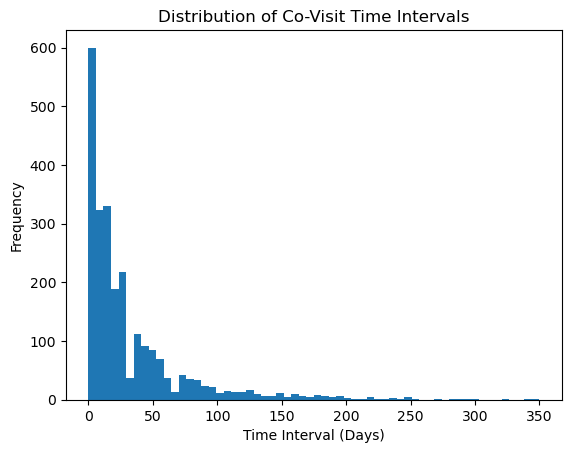

In [44]:
plt.hist(co_visit_rows['VISIT_DIFF'].dt.days, bins=60)  

plt.xlabel('Time Interval (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Co-Visit Time Intervals')

plt.show()

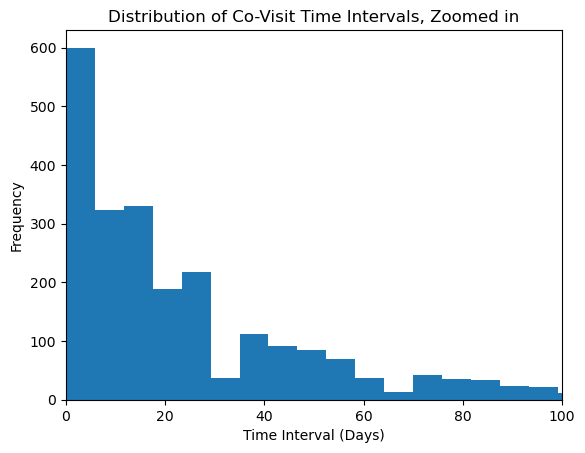

In [45]:
# zoom in a bit
plt.hist(co_visit_rows['VISIT_DIFF'].dt.days, bins=60)  

plt.xlabel('Time Interval (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Co-Visit Time Intervals, Zoomed in')
plt.xlim(0, 100)  

plt.show()

* Children can have up to 6 co-visits per year. How many are recieving all 6 visits? Are there any who are exceeding 6 visits?

In [13]:
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

child_ids_with_co_visit = co_visit_rows.groupby('CHILD_ID').size()

x = child_ids_with_co_visit[child_ids_with_co_visit >= 6]

x = x.sort_values(ascending=False)

print(x)


CHILD_ID
494031    48
480109    33
494794    31
481017    31
511895    30
          ..
511428     6
511790     6
512805     6
513218     6
532432     6
Length: 131, dtype: int64


* Who is performing co-visits? Are they generally performed by the same provider or discipline or by multiple providers or disciplines? Is it more likely for a co-visit to occur if vendor services are within the same agency?

In [17]:
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

# Group by 'ADD_USER' and 'Agency Name' and count the number of occurrences
co_visit_counts = co_visit_rows.groupby(['ADD_USER', 'Agency Name']).size()

# Sort the co-visit counts in descending order
co_visit_counts = co_visit_counts.sort_values(ascending=False)

# Print the resulting counts
co_visit_counts


ADD_USER           Agency Name                                       
REDDMISSY          LeBonheur EI & Dev (LEAD) (vendor)                    199
ROGERSKALEY        Kid's Putnam, Inc.                                    174
PULLIAMAMY         LeBonheur EI & Dev (LEAD) (vendor)                    129
OLIVERCIARA        LeBonheur EI & Dev (LEAD) (EIRA)                      123
SOSEBEEJULIE1      Cleveland TN Hosp dba Tennova Healthcare-Cleveland    107
                                                                        ... 
LADERACARMEN       Susan Gray School - Vanderbilt Univ                     1
LANKFORDAMBER1     LIFT Therapy dba Sports Plus Lexington                  1
LASTERDENISE       James Developmental Ctr - Small Steps Preschool         1
LAURENCEELIZABETH  Rehab At Your Place (vendor)                            1
WRIGHTJESSICA1     LIFT Therapy dba Sports Plus Dyersburg                  1
Length: 421, dtype: int64

In [18]:
# Filter the rows where IFSP Teaming ID name is Co-Visit
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

# Group by Agency Type and Service Name and count the number of occurrences
co_visit_counts = co_visit_rows.groupby(['Agency Type', 'Service Name']).size()

# Sort the co-visit counts in descending order
co_visit_counts = co_visit_counts.sort_values(ascending=False)

# Print the resulting counts
co_visit_counts


Agency Type  Service Name                                 
EIRA         Dev. Therapy Prof - Home/Community               2399
Independent  Occupational Therapy                              488
             Speech Therapy                                    415
             Physical Therapy                                  297
             Dev. Therapy - BCBA                               127
EIRA         Dev. Therapy Center-Based                         102
             Vision Services                                    59
             Eval/Assess - Developmental                        52
Independent  Evaluation - Occupational Therapy                  26
             Physical Therapy Assistant                         21
             Evaluation - Physical Therapy                      15
             Evaluation - Speech Therapy                        15
EIRA         Occupational Therapy                               14
             Physical Therapy Assistant                         11
   

In [19]:
co_visit_rows = teaming_df[teaming_df['IFSP Teaming ID name'] == 'Co-Visit']

# Count the values for each SERVICE_SETTING
service_setting_counts = co_visit_rows['SERVICE_SETTING'].value_counts()

# Print the resulting counts
print(service_setting_counts)


Home               1941
Community-based     871
Telehealth          775
Other               501
Name: SERVICE_SETTING, dtype: int64


* Does participation vary by service type? by point of entry?

In [20]:
# inspecting
ifsps_df.head()

,POE,Child ID,Referral Date,Exit Date
0,ET,508615,2021-08-06,NaT
1,ET,488455,2021-11-02,NaT
2,ET,494500,2020-12-14,NaT
3,ET,515143,2021-11-22,NaT
4,ET,505490,2021-06-15,NaT


In [21]:
# inspecting
teaming_df.head(3)

,CHILD_ID,SERVICE_DATE,START_TIME,END_TIME,SERVICE_SETTING,SERVICE DELIVERY,ADD_USER,ADD_DATE,IFSP Teaming ID name,Agency Name,Agency Type,Service Name,TIME_DIFFERENCE
0,457136,2022-01-21,09:30:00,10:30:00,Community-based,Service Delivered,LEECAROL1,2022-01-21 17:54:45,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
1,457136,2022-02-15,14:00:00,15:00:00,Community-based,Service Delivered,LEECAROL1,2022-02-16 05:29:12,Co-Visit,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00
2,457585,2022-01-24,08:30:00,09:30:00,Telehealth,Service Delivered,MILLARDCATHERINE,2022-01-24 14:18:29,IEP Meeting,Siskin Children's Institute (EIRA),EIRA,Dev. Therapy Prof - Home/Community,0 days 01:00:00


In [59]:
# Get individual add users' case load count
count_per_user = teaming_df.groupby('ADD_USER')['CHILD_ID'].nunique()

count_per_user_sorted = count_per_user.sort_values(ascending=False)

count_per_user_sorted

ADD_USER
REDDMISSY          52
HARRISKATE         51
WISHARTJENNIFER    43
LONGJENNIFER2      42
MCCOYANGIE         42
                   ..
CASHIONASHLEE       1
REEDSONYA           1
LANKFORDAMBER1      1
ELLIOTTCHRISTIE     1
ACRESDENA           1
Name: CHILD_ID, Length: 529, dtype: int64

In [58]:
# Getting avg case load per case manager
count_per_user = teaming_df.groupby('ADD_USER')['CHILD_ID'].nunique()

count_per_user_avg =  count_per_user.mean()
count_per_user_avg = count_per_user_avg.round(2)

print("The average case load per manager is:",count_per_user_avg)

The average case load per manager is: 10.35


# The average case load per manager is: 10.35

In [53]:
# Count the unique CHILD_IDs per ADD_USER
count_per_service_setting = teaming_df.groupby('SERVICE_SETTING')['CHILD_ID'].nunique()

count_per_service_setting = count_per_service_setting.sort_values(ascending=False)


count_per_service_setting = pd.DataFrame(count_per_service_setting)
count_per_service_setting

,CHILD_ID
SERVICE_SETTING,
Telehealth,2563
Home,2271
Community-based,850
Other,332


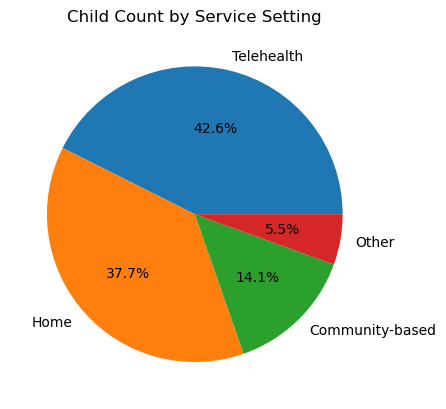

In [56]:
# visualizing service setting breakdown
plt.pie(count_per_service_setting['CHILD_ID'], labels=count_per_service_setting.index, autopct='%1.1f%%')

plt.title('Child Count by Service Setting')

plt.show()
